In [29]:
%run radiomorpho.py

import skimage.feature # local binary patterns and other possibly useful stuff
import skimage.transform
import warnings; warnings.simplefilter('ignore')
from sklearn import decomposition

In [54]:
from matplotlib import offsetbox
def plot_embedding(X, Y, title=None, space = 0.04, figsize=(16, 7)):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1])

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(Y.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < space:
#                 don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            f2 = Y[i]
            scale_fac = (20/f2.shape[0] , 20/f2.shape[1])
            img = sk.transform.rescale(f2, scale_fac, mode='reflect', multichannel=False, anti_aliasing=True)
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(img, cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [2]:
dirs = ('101first_fit', '101nvss_fit')
files, images = readImagesFromDirs(dirs)

error reading image 101first_fit/J0331-2849_z1.0890p_1.09Mpc.fi.fit or 101nvss_fit/J0331-2849_z1.0890p_1.09Mpc.nv.fit


In [20]:
def get_lbp_hist(img, P=360, R=1):
    lbp = skimage.feature.local_binary_pattern(img, P, R, method='uniform')
    return sk.exposure.histogram(lbp)[0]

In [10]:
images_clean = np.array([[remove_data_bellow_threshold(img) for img in images[:, i]] for i in range(3)])

In [17]:
NVSS_imgs  = images_clean[0]
FIRST_imgs = images_clean[1]
MIX_imgs   = images_clean[2]

In [87]:
data = []
for img in NVSS_imgs:
    vec = np.concatenate( (
        get_lbp_hist(img, P=360, R = 1), 
        get_lbp_hist(img, P=360, R = 4), 
        get_lbp_hist(img, P=360, R = 8),
        get_lbp_hist(img, P=360, R = 16))
    )
    data.append(vec)
data = np.array(data)

[9.99998196e-01 1.40529001e-06]


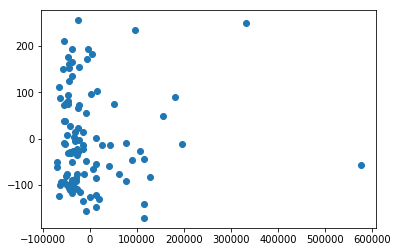

In [88]:
pca = decomposition.PCA(n_components=2)
pca.fit(data)
Y = pca.transform(data)
xs, ys = Y[:,0] , Y[:,1]
print(pca.explained_variance_ratio_)
plt.scatter(Y[:,0], Y[:,1])
plt.show()

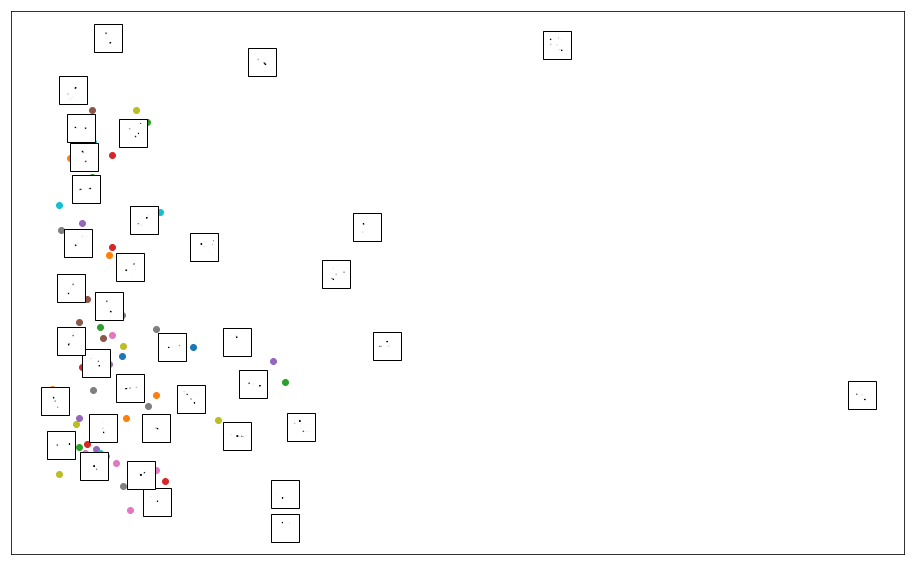

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
plot_embedding(Y, NVSS_imgs , space = 0.003, figsize=(16, 10))

In [92]:
%%time
data2 = []
for img in FIRST_imgs:
    vec = np.concatenate( (
        get_lbp_hist(img, P=360, R = 1), 
        get_lbp_hist(img, P=360, R = 4), 
        get_lbp_hist(img, P=360, R = 8),
        get_lbp_hist(img, P=360, R = 16))
    )
    data2.append(vec)
data2 = np.array(data2)

CPU times: user 1.53 s, sys: 8.84 ms, total: 1.54 s
Wall time: 1.56 s


[9.9919502e-01 3.3313992e-04]


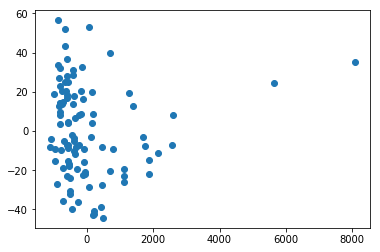

In [93]:
pca = decomposition.PCA(n_components=2)
pca.fit(data2)
Y = pca.transform(data2)
xs, ys = Y[:,0] , Y[:,1]
print(pca.explained_variance_ratio_)
plt.scatter(Y[:,0], Y[:,1])
plt.show()

In [94]:
data.shape

(100, 1024)

In [95]:
data2.shape

(100, 1024)

In [99]:
data_full = np.append(data, data2, axis=1)

[9.99995476e-01 2.56585081e-06]


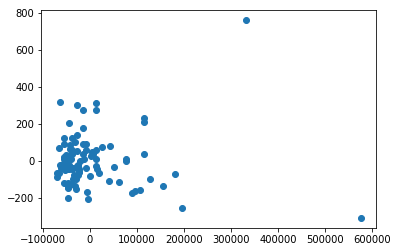

In [100]:
pca = decomposition.PCA(n_components=2)
pca.fit(data_full)
Y = pca.transform(data_full)
xs, ys = Y[:,0] , Y[:,1]
print(pca.explained_variance_ratio_)
plt.scatter(Y[:,0], Y[:,1])
plt.show()

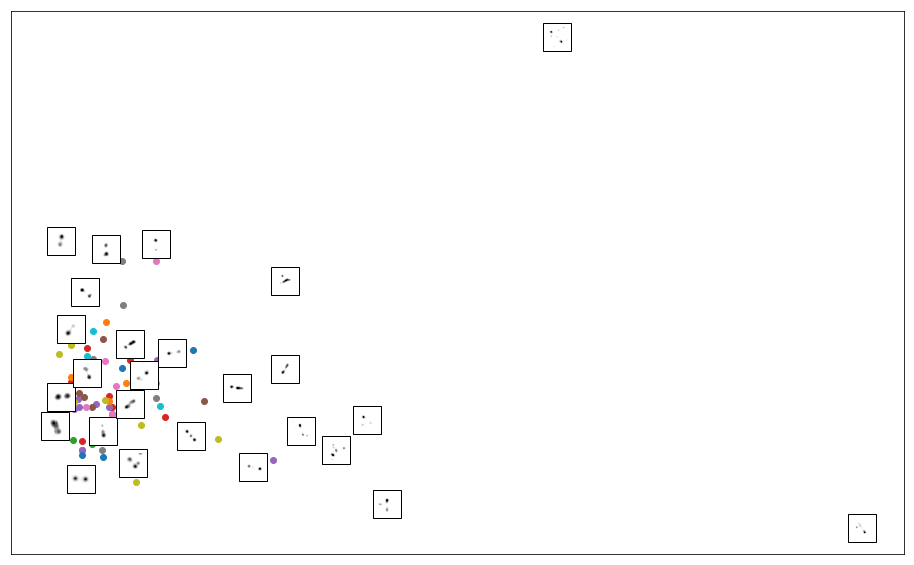

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plot_embedding(Y, MIX_imgs , space = 0.003, figsize=(16, 10))